# MEDICAL HEALTH INSURANCE PREDICTION THROUGH REGRESSION ALGORITHMS

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# Importing Libraries


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis




In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [88]:
df.shape

(1338, 7)

In [89]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [90]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [91]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

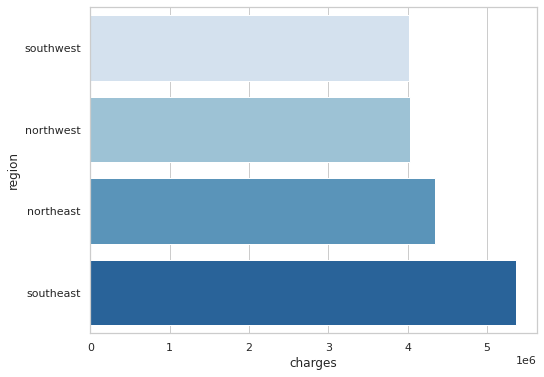

In [92]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

INSIGHT # 01 - The highest medical charges are in the Southeast and the lowest 
are in the Southwest.

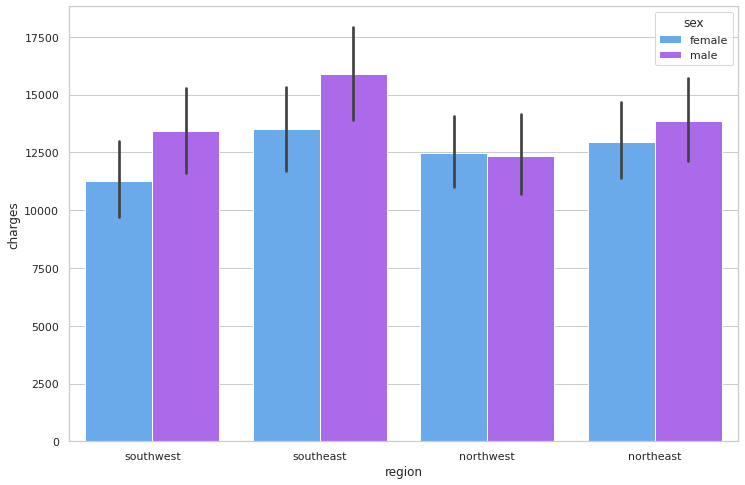

In [93]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

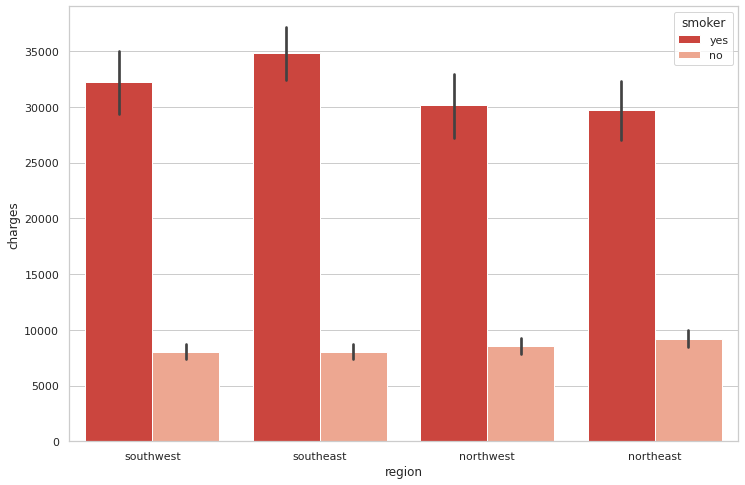

In [94]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

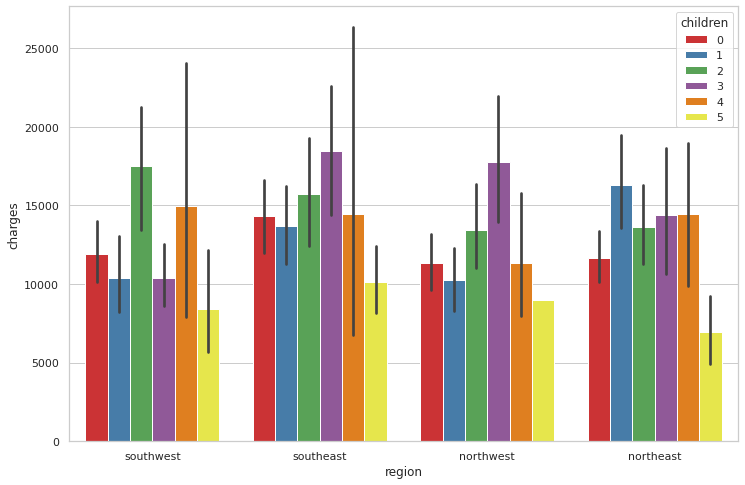

In [95]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

INSIGHT # 02 – From these bar plots the highest charges due to smoking are still 
in the Southeast but the lowest are in the Northeast. People in the Southwest 
generally smoke more than people in the Northeast, but people in the Northeast 
have higher charges by gender than in the Southwest and Northwest overall. And 
people with children tend to have higher medical costs overall as well

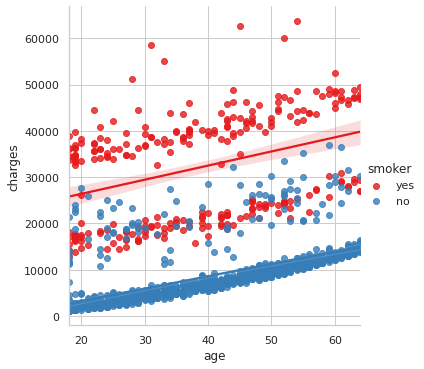

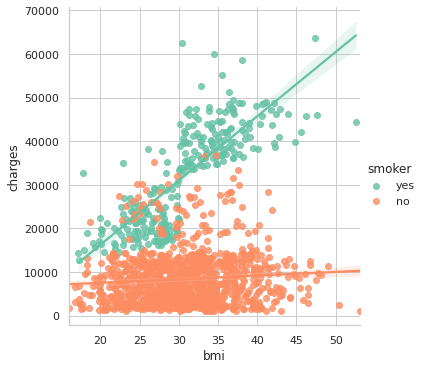

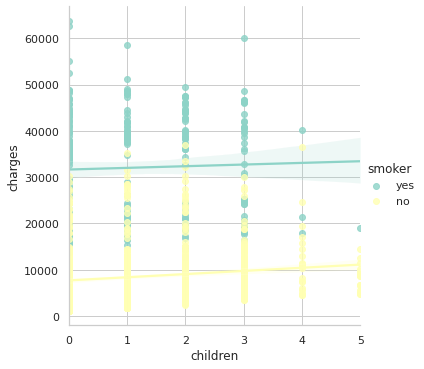

In [96]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

INSIGHT # 03 – Smoking has the highest impact on medical costs, even though 
the costs are growing with age, bmi and children.

Now we will use Label Encoding which is a preprocessing technique to normalize labels to assign numbers to each of the features using Label Encoder class from scikit Learn library

In [97]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [98]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [99]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# TEST TRAIN SPLITTING OF DATASET


*   Traing Dataset = 80%

*   Testing Dataset = 20%








In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# MACHINE LEARNING ALGORITHMS FOR REGRESSION

Now we will apply different REGRESSION methods to compare the accuracy of prediction of the REGRESSION models in predicting the medical insurance charges from the training data fed into the model
 
The following Machine Learning models are  implemented:

*   Linear Regression
*   KNN Regression





<font size=5><p style="color:purple"> Linear Regression

In [101]:
Lin_reg = LinearRegression()
Y_pred = Lin_reg.fit(x_train, y_train).predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [102]:
print("lr.coef_: {}".format(Lin_reg.coef_))
print("lr.intercept_: {}".format(Lin_reg.intercept_))

lr.coef_: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
lr.intercept_: -11661.983908824413


In [103]:
print("Training set score: {:.2f}%".format(round(Lin_reg.score(x_train, y_train)*100,2)))
print("R^2: {:.2f}".format(Lin_reg.score(x_test, y_test)))

Training set score: 73.68%
R^2: 0.80


In [104]:
import numpy as np
MRE_sum = 0
prediction = Lin_reg.predict(x_train)

numinator = abs(np.subtract(prediction , y_train))
MRE_sum = np.divide(numinator , y_train)
MRE_sum = np.sum(MRE_sum)

MRE = MRE_sum / len(y_train)
print("MEAN RELATIVE ERROR = " ,MRE)

MEAN RELATIVE ERROR =  0.4301085041942161


# KNN REGRESSION 

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [106]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Knn_reg = KNeighborsRegressor(n_neighbors=3)
Y_pred = Knn_reg.fit(x_train, y_train).predict(x_test)

# print("Test set predictions:\n{}".format(Knn_reg.predict(x_test)))

In [107]:
print("Training set score: {:.2f}%".format(round(Knn_reg.score(x_train, y_train)*100,2)))
print("Test set R^2: {:.2f}".format(Knn_reg.score(x_test, y_test)))

Training set score: 52.72%
Test set R^2: 0.23


In [108]:
import numpy as np
MRE_sum = 0
prediction = Knn_reg.predict(x_train)

numinator = abs(np.subtract(prediction , y_train))
MRE_sum = np.divide(numinator , y_train)
MRE_sum = np.sum(MRE_sum)

MRE = MRE_sum / len(y_train)
print("MEAN RELATIVE ERROR = " ,MRE)

MEAN RELATIVE ERROR =  0.583020399509209


# CONCLUSION

Linear regression performed better as its model fits our data with R2 value 
greater than KNN Regression and also because it has lower MRE than KNN 
Regression